In [140]:
import numpy as np

In [141]:
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
print("4マスの板に小麦を並べる（リスト）：{}".format(small_board_list))

small_board_ndarray = np.array(small_board_list)
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

4マスの板に小麦を並べる（リスト）：[1, 2, 4, 8]
4マスの板に小麦を並べる（ndarray）：[1 2 4 8]


In [142]:
# 問題1
small_board_ndarray.reshape(2,2)

array([[1, 2],
       [4, 8]])

In [143]:
# 問題2
def create_chess_board(n, m):
    return np.array([2 ** x for x in range(0, n * m)]).reshape(n,m)

chess_board = create_chess_board(8,8)

print("チェス盤:\n{}".format(chess_board))
print("チェス盤の小麦の数: {}".format(np.sum(chess_board)))

チェス盤:
[[1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02]
 [2.56000000e+02 5.12000000e+02 1.02400000e+03 2.04800000e+03
  4.09600000e+03 8.19200000e+03 1.63840000e+04 3.27680000e+04]
 [6.55360000e+04 1.31072000e+05 2.62144000e+05 5.24288000e+05
  1.04857600e+06 2.09715200e+06 4.19430400e+06 8.38860800e+06]
 [1.67772160e+07 3.35544320e+07 6.71088640e+07 1.34217728e+08
  2.68435456e+08 5.36870912e+08 1.07374182e+09 2.14748365e+09]
 [4.29496730e+09 8.58993459e+09 1.71798692e+10 3.43597384e+10
  6.87194767e+10 1.37438953e+11 2.74877907e+11 5.49755814e+11]
 [1.09951163e+12 2.19902326e+12 4.39804651e+12 8.79609302e+12
  1.75921860e+13 3.51843721e+13 7.03687442e+13 1.40737488e+14]
 [2.81474977e+14 5.62949953e+14 1.12589991e+15 2.25179981e+15
  4.50359963e+15 9.00719925e+15 1.80143985e+16 3.60287970e+16]
 [7.20575940e+16 1.44115188e+17 2.88230376e+17 5.76460752e+17
  1.15292150e+18 2.30584301e+18 4.61168602e+18 9.22337204

In [144]:
print(create_chess_board(2,3))
print(chess_board.shape[0])
print(np.arange(1, chess_board.ndim +1))
np.sum(create_chess_board(2,3), axis=1)

[[ 1  2  4]
 [ 8 16 32]]
8
[1 2]


array([ 7, 56])

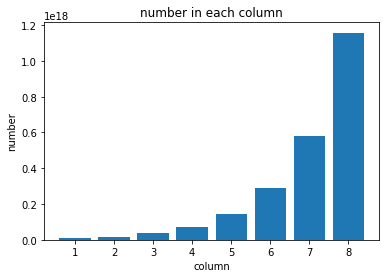

In [145]:
# 課題3
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel("column")
plt.ylabel("number")
plt.title("number in each column")
plt.bar(np.arange(1,chess_board.shape[0] + 1), np.mean(chess_board, axis=0))
plt.show()

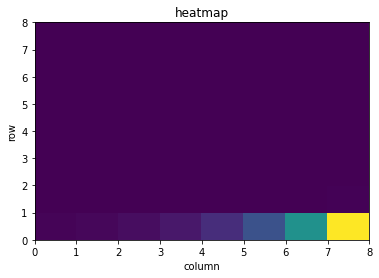

In [153]:
# 課題4
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(chess_board[::-1])
plt.show()

In [147]:
# 問題5
first_half, second_half = np.split(chess_board, 2)
print(first_half.sum())
print("前半の総和: {}, 後半の総和: {}, 後半は前半の{}倍".format(first_half.sum(), second_half.sum(), second_half.sum() / first_half.sum()))

4294967295.0
前半の総和: 4294967295.0, 後半の総和: 1.8446744069414584e+19, 後半は前半の4294967296.0倍


In [148]:
# サンプル
n_squares = 64
indices_of_squares = np.arange(n_squares).astype(np.uint64)
board_ndarray = 2**indices_of_squares
print("最後のマスの小麦の数：{}".format(board_ndarray[-1]))

最後のマスの小麦の数：9223372036854775808


In [149]:
# 課題6
def create_chess_board_ver_append(n, m):
    board_ndarray = np.array([1]).astype(np.uint64)
    for _ in range((n * m) - 1):
        board_ndarray = np.append(board_ndarray, 2*board_ndarray[-1])
    return board_ndarray
        
def create_chess_board_ver_boardcast(n, m):
    indices_of_squares = np.arange((n * m)).astype(np.uint64)
    return 2**indices_of_squares

print("append使った関数での結果: {}".format(np.sum(create_chess_board_ver_append(8,8))))
print("boardcast使った関数での結果: {}".format(np.sum(create_chess_board_ver_boardcast(8,8))))

append使った関数での結果: 1.8446744073709552e+19
boardcast使った関数での結果: 18446744073709551615


In [150]:
%%timeit
# 問題7 (問題2で使ったもの)
create_chess_board(8,8)

27.6 µs ± 871 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [151]:
%%timeit
# 問題7 (np.appendを使ったもの) 一番遅い
create_chess_board_ver_append(8,8)

374 µs ± 20.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [152]:
%%timeit
# 問題7 (boardcastを使ったもの) 一番早い
create_chess_board_ver_boardcast(8,8)

2.78 µs ± 96.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
